**Лекция 6**

# Собственные векторы и собственные значения #

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Матрицы-линейных-преобразований" data-toc-modified-id="Матрицы-линейных-преобразований-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Матрицы линейных преобразований</a></span></li><li><span><a href="#Собственные-векторы-и-собственные-значения" data-toc-modified-id="Собственные-векторы-и-собственные-значения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Собственные векторы и собственные значения</a></span></li><li><span><a href="#Диагонализируемость" data-toc-modified-id="Диагонализируемость-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Диагонализируемость</a></span><ul class="toc-item"><li><span><a href="#Подобные-матрицы" data-toc-modified-id="Подобные-матрицы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подобные матрицы</a></span></li><li><span><a href="#Диагонализируемые-матрицы" data-toc-modified-id="Диагонализируемые-матрицы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Диагонализируемые матрицы</a></span></li><li><span><a href="#Недиагонализируемые-матрицы" data-toc-modified-id="Недиагонализируемые-матрицы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Недиагонализируемые матрицы</a></span></li></ul></li><li><span><a href="#Иллюстрации-на-Питоне" data-toc-modified-id="Иллюстрации-на-Питоне-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Иллюстрации на Питоне</a></span></li><li><span><a href="#Симметричные-матрицы" data-toc-modified-id="Симметричные-матрицы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Симметричные матрицы</a></span></li><li><span><a href="#Полярное-разложение" data-toc-modified-id="Полярное-разложение-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Полярное разложение</a></span></li><li><span><a href="#Алгоритмы-поиска-собственных-чисел" data-toc-modified-id="Алгоритмы-поиска-собственных-чисел-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Алгоритмы поиска собственных чисел</a></span><ul class="toc-item"><li><span><a href="#$\mathbf{QR}$-алгоритм" data-toc-modified-id="$\mathbf{QR}$-алгоритм-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>$\mathbf{QR}$-алгоритм</a></span></li></ul></li><li><span><a href="#Источники" data-toc-modified-id="Источники-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import sys
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
# Styles
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['lines.markersize'] = 4
cm = plt.cm.tab10  # Colormap

import seaborn
seaborn.set_style('whitegrid')

---

## Матрицы линейных преобразований ##

Квадратную матрицу $A$ размером $n \times n$ мы интерпретируем как преобразование, действующее на вектор $\mathbf{x} \in \mathbb{R}^n$, преобразуя его в новый вектор $\mathbf{y} = A\mathbf{x}$, также лежащий в $\mathbb{R}^n$.

**Примеры:**

1. Матрица поворота
$$
  A = 
  \begin{pmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} &  \cos{\theta}
  \end{pmatrix}.
$$

1. Матрица растяжения
$$
  B = 
  \begin{pmatrix}
    k & 0 \\
    0 & 1
  \end{pmatrix}.
$$

In [3]:
x = np.array([1,0]) # Original vector
theta = 30 * np.pi / 180 # degress in radian
# Rotation matrix
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
# Stretching matrix
B = np.array([[3,0],
              [0,1]])

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

# Reshaping and storing both x and Ax in y1 to be plotted as vectors
y1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in y2 to be plotted as vectors
y2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])
origin = [[0,0], [0,0]] # origin point

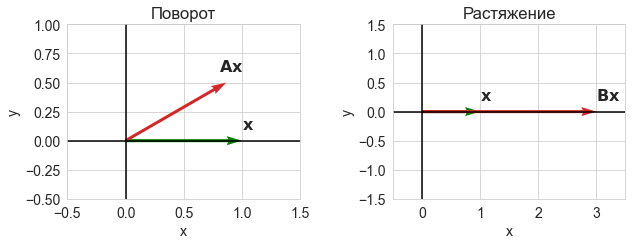

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
plt.subplots_adjust(wspace=0.4)

# Plotting y1
ax1.quiver(*origin, y1[:,0], y1[:,1], color=['g', cm(3)],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5, 1.5])
ax1.set_ylim([-0.5, 1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Поворот")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting y2
ax2.quiver(*origin, y2[:,0], y2[:,1], color=['g', cm(3)],
           width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5, 3.5])
ax2.set_ylim([-1.5, 1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Растяжение")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

Рассмотрим другую матрицу:
$$
  C = 
  \begin{pmatrix}
    3 & 2 \\
    0 & 2
  \end{pmatrix}.
$$

На рисунке показано преобразование множества точек $X$ (окружность) и, в частности, двух векторов $\mathbf{x_1}$ и $\mathbf{x_2}$.
Начальные векторы $X$ с левой стороны образуют окружность, матрица преобразования изменяет эту окружность и превращает её в эллипс.
Векторы выборки $\mathbf{x_1}$ и $\mathbf{x_2}$ в окружности преобразуются в $\mathbf{y_1}$ и $\mathbf{y_2}$ соответственно.

In [5]:
# Creating the vectors for a circle and storing them in x
r = 1
phi = np.linspace(0, 2*np.pi, 100)
xi = r*np.cos(phi)
yi = r*np.sin(phi)
X = np.vstack((xi, yi))

C = np.array([[3, 2],
              [0, 2]])
Y = C @ X  # Vectors in t are the transformed vectors of x

# getting a sample vector from x
xs_1 = X[:, 15]
xs_2 = X[:, 0]
ys_1 = C @ xs_1
ys_2 = C @ xs_2

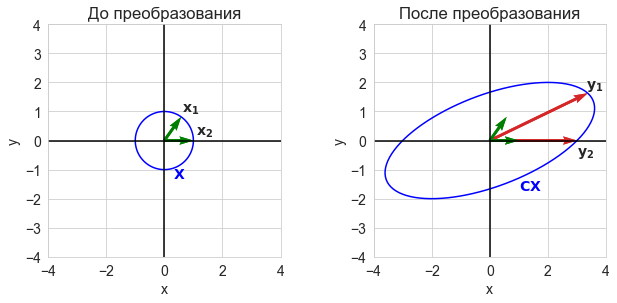

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting X
ax1.plot(X[0,:], X[1,:], color='b')
ax1.quiver(*origin, xs_1[0], xs_1[1], color=['g'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, xs_2[0], xs_2[1], color=['g'], width=0.012,
           angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("До преобразования")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.6, 1.0, "$\mathbf{x_1}$")
ax1.text(1.1, 0.2, "$\mathbf{x_2}$")
ax1.text(0.3, -1.3, "$\mathbf{X}$", color='b')

# Plotting Y
ax2.plot(Y[0, :], Y[1, :], color='b')
ax2.quiver(*origin, ys_1[0], ys_1[1], color=cm(3),
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, ys_2[0], ys_2[1], color=cm(3),
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, xs_1[0], xs_1[1], color=['g'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, xs_2[0], xs_2[1], color=['g'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("После преобразования")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(3.3,  1.8, "$\mathbf{y_1}$")
ax2.text(3.0, -0.5, "$\mathbf{y_2}$")
ax2.text(1.0, -1.7, "$\mathbf{CX}$", color='b')

# plt.savefig('1.png', dpi=300, bbox_inches='tight')
plt.show()

Общее влияние преобразования $C$ на вектор $\mathbf{x}$ &mdash; это сочетание вращения и растяжения.
Например, оно изменяет  длину и направление вектора $\mathbf{x_1}$.
Однако вектор $\mathbf{x_2}$ после преобразования изменяет только длину &mdash;
матрица $C$ растягивает вектор $\mathbf{x_2}$.
<!-- Единственный способ изменить величину вектора без изменения его направления &mdash; умножить его на скаляр. -->
Таким образом, для вектора $\mathbf{x_2}$ эффект умножения на $C$ подобен умножению на скалярное число $\lambda$:
$$ C\mathbf{x_2} = \lambda \mathbf{x_2}. $$

---

## Собственные векторы и собственные значения ##

При исследовании структуры линейного оператора с матрицей $A$ большую роль играют векторы $\mathbf{x}$, для которых
$$ A\mathbf{x} = \lambda\mathbf{x}. $$

Такие векторы называются *собственными векторами*, а соответствующие им числа $\lambda$ &mdash; *собственными числами* матрицы $A$.

Для нахождения собственных чисел матрицы $A$ используется *характеристическое уравнение*
$$ \mathrm{det}(A - \lambda E). $$


**Некоторые свойства собственных векторов и собственных значений:**

- Сумма собственных значений равна следу матрицы: $\sum\limits_{i+1}^{n} \lambda_i  = \mathrm{tr}(A)$
- Произведение собственных значений равна определителю матрицы: $\prod\limits_{i=1}^n \lambda_i = \mathrm{det}(A)$
- Если матрица $A$ треугольная, то собственные значения совпадают с её диагональными элементами
- Собственные значений матрицы $A^k$ равны $\lambda_i^k$, а собственные вектора матриц $A^k$ и $A$ совпадают
- Собственные векторы матрицы $A$ ортогональны тогда и только тогда, когда $A^\top A = A A^\top$

Почему для нас важны собственные векторы?\
Как уже упоминалось ранее, собственный вектор превращает умножение на матрицу в умножение на скаляр.

Собственные векторы, их количество и вид, зависят от матрицы $A$.
Пусть матрица $A$ размером $n \times n$ имеет $n$ независимых собственных векторов (такая ситуация встречается довольно часто).
В этом случае собственные векторы образуют базис, по которому можно разложить любой интересующий нас вектор:
$$ \mathbf{v} = c_1\mathbf{u_1} + \ldots + c_n\mathbf{u_n}. $$

И умножение любого вектора на матрицу $A^k$ можно представить в виде суммы
$$ A^k\mathbf{v} = c_1\lambda_1^k\mathbf{u_1} + \ldots + c_n\lambda_n^k\mathbf{u_n}. $$

---

## Диагонализируемость ##

### Подобные матрицы ###

**Определение.** Матрицы $A$ и $B$ называются подобными, если существует невырожденная матрица $U$ такая, что $B = U^{-1}AU$. Матрица $U$ в этом случае называется матрицей перехода к другому базису.

**Предложение 1.** Подобные матрицы имеют одни и те же собственные числа.

### Диагонализируемые матрицы ###

Пусть матрица $A$ размера $n \times n$ имеет $n$ линейно независимых собственных векторов.
Если взять эти векторы в качестве столбцов матрицы $U$, то $U^{-1}AU$ будет диагональной матрицей $\Lambda$, у которой на диагонали стоят собственные значения матрица $A$. 

**Теорема 1.** Матрица $A$ диагонализируема тогда и только тогда, когда существует базис из собственных векторов.

**Теорема 2.** Матрица $A$ диагонализируема тогда и только тогда, когда кратность корня характеристического уравнения совпадает с размерностью собственного подпространства (алгебраическая кратность собственного значения совпадает с его геометрической кратностью).


**Замечания:**

1. Если все собственные значения матрицы различны, то матрица может быть приведена к диагональному виду.
1. Диагонализирующая матрица $U$ неединственна (особенно в случае кратных собственных значений).
1. Равенство $AU = U\Lambda$ выполняется тогда и только тогда, когда столбцы матрицы $U$ являются собственными векторами.
1. Не все матрицы диагонализируемы.

### Недиагонализируемые матрицы ###

В общем случае матрица поворота не является диагонализируемой над вещественными числами, но все матрицы поворота диагонализируемы над полем комплексных чисел.

Некоторые матрицы нельзя диагонализовать ни в $\mathbb{R}$, ни в $\mathbb{C}$.
Среди них можно указать *ненулевые нильпотентные матрицы*.

**Определение.** Нильпотентная матрица &mdash; матрица $N$, для которой существует целое число $k$ такое, что выполняется условие $N^k=0$.

**Примеры:**

1.
$$
  N_1 = 
  \begin{pmatrix}
    0 & 1 \\
    0 & 0
  \end{pmatrix},
  \quad
  N^2 = 0
$$

2.
$$
  N_2 = 
  \begin{pmatrix}
    5  & -3 & 2 \\
    15 & -9 & 6 \\
    10 & -6 & 4 \\
  \end{pmatrix},
  \quad
  N^2 = 0
$$

3.
$$
  A_1 = 
  \begin{pmatrix}
    5 & 1 \\
    0 & 5
  \end{pmatrix}
$$

4.
$$
  A_2 = 
  \begin{pmatrix}
    6 & -1 \\
    1 & 4
  \end{pmatrix}
$$

---

## Иллюстрации на Питоне ##

Воспользуемся модулем `numpy.linalg` и найдём собственные числа и собственные векторы матрицы $C$.
Далее немного порисуем.

Но для начала проверим наши недиагонализируемые матрицы.

In [7]:
def diagonalize(A):
    lmbd, U = LA.eig(A)
    print('lambda = ', np.round(lmbd, 4))
    print('U = ')
    np.disp(U)

In [8]:
N1 = np.array([[0, 1],
               [0, 0]])

diagonalize(N1)

lambda =  [0. 0.]
U = 
[[ 1.00000000e+000 -1.00000000e+000]
 [ 0.00000000e+000  2.00416836e-292]]


In [9]:
N2 = np.array([[ 5, -3, 2],
               [15, -9, 6],
               [10, -6, 4]])

diagonalize(N2)

lambda =  [-0.  0. -0.]
U = 
[[0.26726124 0.26726125 0.0636827 ]
 [0.80178373 0.80178372 0.62488259]
 [0.53452248 0.53452249 0.77811713]]


In [10]:
A1 = np.array([[5, 1],
               [0, 5]])

diagonalize(A1)

lambda =  [5. 5.]
U = 
[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.11022302e-15]]


In [11]:
A2 = np.array([[6, -1],
               [1,  4]])

diagonalize(A2)

lambda =  [5. 5.]
U = 
[[0.70710679 0.70710678]
 [0.70710678 0.70710679]]


Теперь поработаем с матрицей $C$:
$$
  C = 
  \begin{pmatrix}
    3 & 2 \\
    0 & 2
  \end{pmatrix}.
$$

In [12]:
lmbd, U = LA.eig(C)
CU = C @ U
print('lambda = ', np.round(lmbd, 4))
# print('U = ')
# np.disp(np.round(U, 4))

lambda =  [3. 2.]


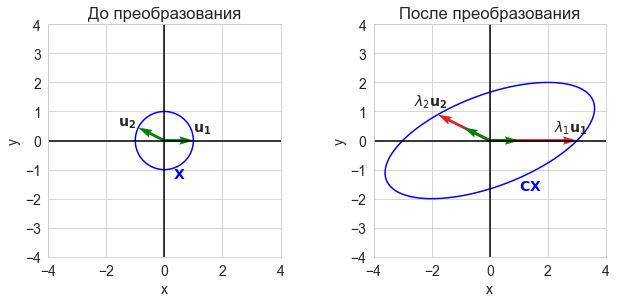

In [13]:
Y = C @ X  # Vectors in y are the transformed vectors of x

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(X[0,:], X[1,:], color='b')
ax1.quiver(*origin, U[0,:], U[1,:], color=['g'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("До преобразования")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, -1.3, "$\mathbf{X}$", color='b', fontsize=14)

# Plotting t
ax2.plot(Y[0, :], Y[1, :], color='b')
ax2.quiver(*origin, CU[0,:], CU[1,:], color=cm(3),
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, U[0,:], U[1,:], color=['g'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("После преобразования")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.2, 0.3, "$\lambda_1 \mathbf{u_1}$", fontsize=14)
ax2.text(-2.6, 1.2, "$\lambda_2 \mathbf{u_2}$", fontsize=14)
ax2.text(1.0, -1.7, "$\mathbf{CX}$", color='b', fontsize=14)

plt.show()

Теперь рассмотрим действие матрицы $U \Lambda U^{-1}$ пошагово.

In [14]:
X1 = LA.inv(U) @ X
X2 = np.diag(lmbd) @ X1
X3 = U @ X2
Xn = [X, X1, X2, X3]
Xn_str = ["$\mathbf{X}$", "$\mathbf{U^{-1}X}$",
          "$\mathbf{\Lambda U^{-1}X}$", "$\mathbf{U\Lambda U^{-1}X}$"]

U1 = LA.inv(U) @ U
U2 = np.diag(lmbd) @ U1
U3 = U @ U2
Un = [U, U1, U2, U3]

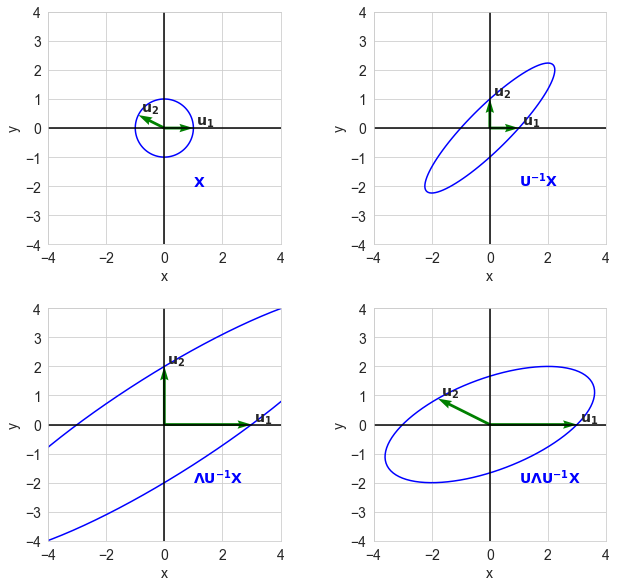

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.4)

for i, axi in enumerate(ax.flatten()):
    axi.plot(Xn[i][0,:], Xn[i][1,:], color='b')
    axi.quiver(*origin, Un[i][0,:], Un[i][1,:], color=['g'],
               width=0.012, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x', fontsize=14)
    axi.set_ylabel('y', fontsize=14)
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    # axi.set_title("Original vectors")
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Un[i].T[0]+[.1,.1]), "$\mathbf{u_1}$", fontsize=14)
    axi.text(*(Un[i].T[1]+[.1,.1]), "$\mathbf{u_2}$", fontsize=14)
    axi.text(1, -2, Xn_str[i], color='b', fontsize=14)

## Симметричные матрицы ##

Рассмотрим симметричную матрицу $S = S^\top$.

**Свойства:**

1. все собственные числа вещественны,
1. из собственных векторов всегда можно составить ортонормированный базис.

Симметричную матрицу можно привести к диагональному виду:
$$ S = Q \Lambda Q^\top, $$
где $Q$ &mdash; диагональная матрица.

Следовательно, любая симметричная матрица может быть представлена в виде

$$ S = \sum\limits_{i=1}^n \lambda_i \mathbf{q}_i \mathbf{q}_i^\top. $$

Это разложение известно под названием **спектральное разложение**. \
Оно выражает матрицу $S$ в виде комбинации одномерных проекций.
Они разбивают любой вектор $\mathbf{v}$ на его компоненты $\mathbf{p} = \mathbf{q}_i \mathbf{q}_i^\top \mathbf{v}$ по направлениям единичных собственных векторов.

Действие оператора с матрицей $S$ сводится к растяжению этих проекций в $\lambda_i$ раз:

$$ S\mathbf{v} = \sum\limits_{i=1}^n \lambda_i \mathbf{q}_i \mathbf{q}_i^\top \mathbf{v}. $$

Рассмотрим симметричную матрицу:
$$
  S = 
  \begin{pmatrix}
    3 & 1 \\
    1 & 2
  \end{pmatrix}.
$$

Найдём собственные значения и нарисуем собственные векторы.

Мы видим, что собственные векторы находятся вдоль главных осей эллипса.
Таким образом, матрица $Q$ преобразует начальную окружность, растягивая её вдоль собственных векторов $\mathbf{q_1}$ и $\mathbf{q_2}$ в $\lambda_1$ и $\lambda_2$ раз соответственно.

<!-- Если абсолютное значение собственного значения больше 1, то вдоль него происходит растяжение, а если меньше &mdash; сжитие. -->
<!-- Отрицательные собственные значения соответствуют зеркальному отражению. -->

In [16]:
S = np.array([[3, 1],
              [1, 2]])
lmbd, Q = LA.eig(S)
SQ = Q @ np.diag(lmbd)   # S*Q = Q*Lmbd
print('lambda = ', np.round(lmbd, 4))

lambda =  [3.618 1.382]


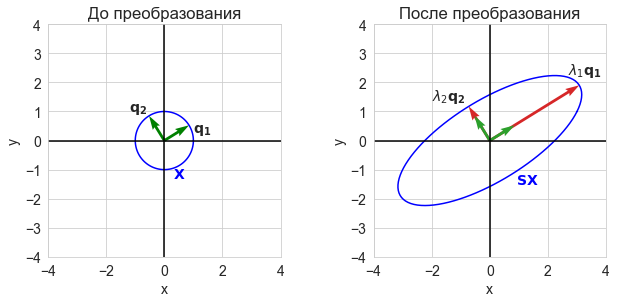

In [17]:
Y = S @ X   # Vectors in t are the transformed vectors of x
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting X
ax1.plot(X[0,:], X[1,:], color='b')
ax1.quiver(*origin, Q[0,:], Q[1,:], color=['g'],
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("До преобразования")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{q_1}$", fontsize=14)
ax1.text(-1.2, 1.0, "$\mathbf{q_2}$", fontsize=14)
ax1.text(0.3, -1.3, "$\mathbf{X}$", color='b', fontsize=14)

# Plotting Y
ax2.plot(Y[0, :], Y[1, :], color='b')
ax2.quiver(*origin, SQ[0,:], SQ[1,:], color=cm(3),
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, Q[0,:], Q[1,:], color=cm(2),
           width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("После преобразования")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.7, 2.3, "$\lambda_1 \mathbf{q_1}$", fontsize=14)
ax2.text(-2.0, 1.4, "$\lambda_2 \mathbf{q_2}$", fontsize=14)
ax2.text(0.9, -1.5, "$\mathbf{SX}$", color='b', fontsize=14)

plt.show()

---

## Полярное разложение ##

Каждое комплексное число $z = x + iy$ можно представить в виде $z = r e^{i\theta}$.
Вектор $e^{i\theta}$, лежащий на единичной окружности, умножается на число $r \ge 0$ (&laquo;растягивается&raquo; в $r$ раз).

Между комплексными числами и матрицами можно провести аналогию: $r$ и $e^{i\theta}$ &mdash; это симметричная матрица $S$ и ортогональная $Q$.

**Предложение.** Любая квадратная матрица может быть представлена в виде

$$ A = QS, $$

где $Q$ &mdash; ортогональная, а $S$ &mdash; симметричная положительно полуопределённая матрица.
Причём если $A$ невырождена, то $S$ &mdash; строго положительно определённая матрица.
Такое разложение называется *полярным разложением* матрицы $A$.

Таким образом, любое линейное преобразование $A$ можно представить в виде комбинации *вращения* и *растяжения к взаимно перпендикулярным осям*.

In [18]:
from scipy.linalg import polar
Q, S = polar(C)

In [19]:
X1 = S @ X
X2 = Q @ X1
Xn = [X, X1, X2]
Xn_str = ["$\mathbf{X}$", "$\mathbf{SX}$", "$\mathbf{QSX}$"]

lmbd, U = LA.eig(S)
U1 = U @ np.diag(lmbd)   # S*U = U*Lmbd
U1 = S @ U
U2 = Q @ U1
Un = [U, U1, U2]

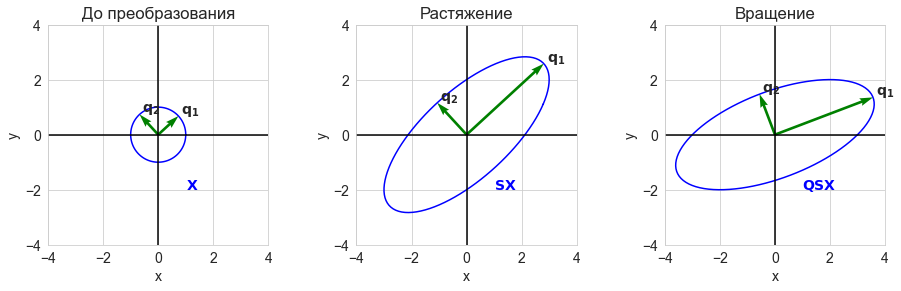

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.4)
titles = ["До преобразования", "Растяжение", "Вращение"]

for i, axi in enumerate(ax.flatten()):
    axi.plot(Xn[i][0,:], Xn[i][1,:], color='b')
    axi.quiver(*origin, Un[i][0,:], Un[i][1,:], color=['g'],
               width=0.012, angles='xy', scale_units='xy', scale=1)
    axi.set_xlabel('x', fontsize=14)
    axi.set_ylabel('y', fontsize=14)
    axi.set_xlim([-4, 4])
    axi.set_ylim([-4, 4])
    axi.set_aspect('equal')
    axi.grid(True)
    axi.set_title(titles[i])
    axi.axhline(y=0, color='k')
    axi.axvline(x=0, color='k')
    axi.text(*(Un[i].T[0]+[.1,.1]), "$\mathbf{q_1}$", fontsize=14)
    axi.text(*(Un[i].T[1]+[.1,.1]), "$\mathbf{q_2}$", fontsize=14)
    axi.text(1, -2, Xn_str[i], color='b', fontsize=14)

---

## Алгоритмы поиска собственных чисел  ##

Проблема собственных значений намного сложнее, чем рассматриваемая нами ранее задача решения системы линейных уравнений.
Все имеющиеся методы её решения могут быть разделены на две большие группы: прямые методы, основанные на решении характеристического уравнения, и итерационные методы.

В прямых методах важным этапом является нахождение коэффициентов характеристического многочлена, так как их вычисление требует осуществления очень большого числа арифметических операций.
Результат, получаемый прямыми методами, является в принципе приближённым, так как корни характеристического многочлена могут быть найдены только приближённо.

К итерационным методам относятся метод вращений, степенной метод и $QR$-алгоритм.
Остановимся на последнем.

### $\mathbf{QR}$-алгоритм ###

В основе этого алгоритма лежит следующий процесс.

Найдём $QR$-разложение исходной матрицы. Пусть $A = Q_1 R_1$. \
Положим $A_1 = R_1 Q_1$ и найдём для матрицы $A_1$ её $QR$-разложение $A_1 = Q_2 R_2$.
Матрицу $A_2$ получим, переставив сомножители $Q_2$ и $R_2$ и т.д.
$$ A_{k-1} = Q_k R_k, \quad A_k = R_k Q_k. $$

При этом $A_k = Q_k^{-1} A_{k-1} Q_k$.
Поэтому все характеристические числа матриц $A_k$ совпадают.

Можно доказать, что те элементы $A_k$, которые лежат ниже диагональных клеток, стремятся к нулю, а элементы этих клеток и вышележащие элементы ограничены.

In [21]:
np.random.seed(12345)

lmbd = [15, 10, 5]
D = np.diag(lmbd)
B = np.random.randint(-5, 5, (3,3))
# print(B)
A = B @ D @ LA.inv(B)

print('lambda = ', np.round(lmbd, 4))
np.disp(A)

lambda =  [15 10  5]
[[ 6.57894737  6.31578947  6.31578947]
 [ 0.26315789 11.05263158  1.05263158]
 [ 1.84210526  2.36842105 12.36842105]]


In [22]:
Ak = A
for i in range(10):
    Q, R = LA.qr(Ak)
    Ak = R @ Q
    print(f'iter {i+1:2}: diag =', np.round(np.diag(Ak), 3))

iter  1: diag = [ 9.4   10.829  9.771]
iter  2: diag = [12.603 10.446  6.952]
iter  3: diag = [14.132 10.461  5.408]
iter  4: diag = [14.659 10.355  4.985]
iter  5: diag = [14.85  10.222  4.928]
iter  6: diag = [14.926 10.129  4.945]
iter  7: diag = [14.959 10.074  4.967]
iter  8: diag = [14.976 10.042  4.982]
iter  9: diag = [14.985 10.025  4.99 ]
iter 10: diag = [14.99  10.015  4.995]


---

## Источники ##

1. *Гантмахер Ф.Р.* Теория матриц. &mdash; М.: Наука, 1967. &mdash; 576 с.
1. *Стренг Г.* Линейная алгебра и её применения. &mdash; М.: Мир, 1980. &mdash; 454 с.
1. *Strang G.* Linear algebra and learning from data. &mdash; Wellesley-Cambridge Press, 2019. &mdash; 432 p.
1. [Материалы](https://towardsdatascience.com/understanding-singular-value-decomposition-and-its-application-in-data-science-388a54be95d) автора [Reza Bagheri](https://reza-bagheri79.medium.com/).
1. *Беклемишев Д.В.* Дополнительные главы линейной алгебры. &mdash; М.: Наука, 1983. &mdash; 336 с.

In [23]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))
# print('scipy: {}'.format(sp.__version__))

Python: 3.7.11
numpy: 1.21.2
matplotlib: 3.4.2
seaborn: 0.11.2
